In [65]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csc_matrix
from scipy.stats import pearsonr
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

In [66]:
# 4
# Loading comments.csv

comments_csv = pd.read_csv("comments.csv", delimiter= ',', usecols=[0, 1, 4])

In [67]:
# 4-6
# Function for generating and plotting pearson correlation scores

"""
	Takes two item-user matrices and calculates pearson correlation first on a per-user basis and plots them. 
	Then the correlation scores are averaged to see if there is a more global correlation between the two scoring systems.

	Assumes that the rows represent items (documents) and the columns represent users 
	and that the rows and columns are in the same order between the matrices
"""
def pearson_analyze(M1, M2):
	correlations = []

	for col_index in range(M1.get_shape()[1]):
		user_vec_1 = M1.getcol(col_index).toarray().flatten()
		user_vec_2 = M2.getcol(col_index).toarray().flatten()

		# Documents the user hasn't interacted with should not affect the correlation
		nonzero_elements = [user_vec_1[i] != 0 or user_vec_2[i] != 0 for i, _ in enumerate(user_vec_1)]

		user_vec_1 = user_vec_1[nonzero_elements]
		user_vec_2 = user_vec_2[nonzero_elements]

		if len(user_vec_1) < 2 or len(user_vec_2) < 2:
			correlations += [np.nan]
		else:
			correlations += [pearsonr(user_vec_1, user_vec_2)[0]]
	
	print(correlations)

	fig, ax = plt.subplots()
	ax.scatter(correlations, [0] * len(correlations))
	ax.set(yticklabels=[])
	ax.tick_params(left=False)

	print("Average correlation between users: " + str(np.nanmean(correlations)))


In [68]:
# 4
# Generate item-user matrix from comments
vader = SentimentIntensityAnalyzer()

unique_users = comments_csv["personId"].unique()
unique_items = comments_csv["contentId"].unique()

unique_users.sort()
unique_items.sort()

vader_item_user_matrix = csc_matrix((len(unique_items), len(unique_users)), dtype=float)

for index, row in comments_csv.iterrows():
	item_index = np.where(unique_items == row["contentId"])[0][0]
	user_index = np.where(unique_users == row["personId"])[0][0]
	vader_item_user_matrix[item_index, user_index] = vader.polarity_scores(row["comment"])["compound"]


#pearson_analyze(vader_item_user_matrix, event_rating_matrix)

C:\Users\mk473\AppData\Roaming\Python\Python311\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


C:\Users\mk473\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


[nan, 0.11035959479172286, nan, nan, nan, 0.05806417527206148, 0.722924333019939, nan, nan, -0.04676474881849185, -1.0, nan, nan, nan, 1.0, nan, nan, 0.31287690586375816, nan, nan, -1.0, -0.2532493314364014, nan, nan, nan, nan, 0.5935100036745273, nan, nan, 0.307917286346484, nan, nan, 0.6465141237797102, nan, 1.0, nan, -0.4040512777771041, nan, nan, -1.0, 0.45170759208238653, 0.6646461060644153, 1.0, nan, nan, nan, 0.37709676824091, 0.8935175384980043, 1.0, nan, nan, nan, nan, nan, nan, 0.7383012277923056, nan, -0.49240608101498434, nan, nan, nan, 1.0, nan, nan, nan, 1.0, nan, -1.0, nan, nan, 0.369334871630162, 0.31592246287308745, nan, nan, 0.4921923918510059, -0.08818575090234179, -0.15932510248850681, nan, 0.11398335414358915, -1.0, 0.1418601921464281, 0.6938128424822255, 1.0, -0.22156005077305768, nan, -0.10733056216740783, 1.0, nan, 1.0, nan, nan, nan, nan, 1.0, 0.774207046448917, -0.05867421926457936, 0.5755355391241197, -0.21730323924427375, nan, 0.23139627079793634, -0.1093177

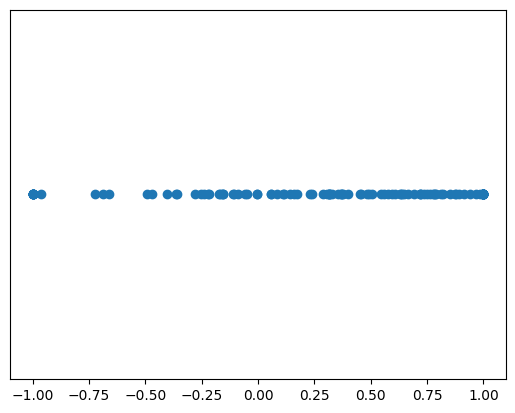

In [69]:
# 5
# Same as #4 but the vader scores are replaced with the comments' size in tokens

token_item_user_matrix = csc_matrix((len(unique_items), len(unique_users)), dtype=float)

for index, row in comments_csv.iterrows():
	item_index = np.where(unique_items == row["contentId"])[0][0]
	user_index = np.where(unique_users == row["personId"])[0][0]
	token_item_user_matrix[item_index, user_index] = len(word_tokenize(row["comment"]))

pearson_analyze(token_item_user_matrix, vader_item_user_matrix)
#pearson_analyze(token_item_user_matrix, event_rating_matrix)

[nan, 0.7579098707710953, nan, nan, nan, 0.43443351856416007, 0.9020943956415781, nan, nan, 0.753898527984046, 1.0, nan, nan, nan, 1.0, nan, nan, 0.9656243767124056, nan, nan, 1.0, 0.3639260345175555, nan, nan, nan, nan, 0.5763307566044045, nan, nan, 0.5064284331749286, nan, -1.0, -0.8848759268051768, nan, 1.0, nan, 0.8886080749029394, nan, nan, -1.0, 0.5892450583906783, -0.2386949256907362, 1.0, nan, nan, nan, 0.6464632170243904, 0.9943329476839786, 1.0, nan, nan, nan, nan, nan, nan, 0.9762210399274298, nan, 0.9576017920487486, nan, nan, nan, 1.0, nan, nan, nan, 1.0, nan, 1.0, nan, nan, 0.7703945379458798, 0.6406470175323238, nan, nan, 0.33839509248819755, 0.9563247157871203, 0.6681826786489511, nan, 0.6888995155311476, 1.0, 0.45347764147594066, 0.7930766230817026, -1.0, 0.8626635792144666, nan, 0.14309269853540504, 1.0, nan, 1.0, nan, nan, nan, nan, 1.0, 0.7419554678458313, 0.8682283796050396, 0.652996052774682, 0.5786218073036223, nan, 0.6384548163693415, 0.6372306507115413, 0.95491

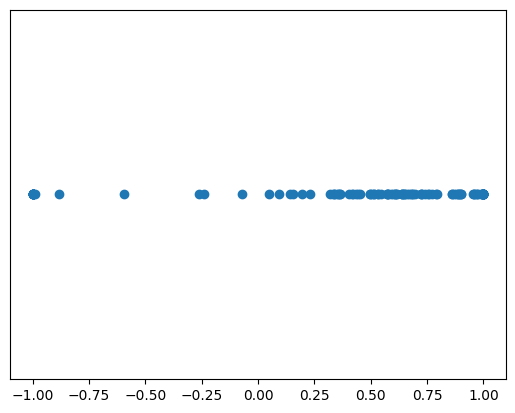

In [70]:
# 6
# Same as #4 but the vader scores are replaced with the comments' ratio of stopwords and words with uncommon characters to other words

stopwords = stopwords.words("english")

stopword_ratio_item_user_matrix = csc_matrix((len(unique_items), len(unique_users)), dtype=float)

for index, row in comments_csv.iterrows():
	item_index = np.where(unique_items == row["contentId"])[0][0]
	user_index = np.where(unique_users == row["personId"])[0][0]

	tokens = word_tokenize(row["comment"])

	stopwords_and_uncommon_chars = [token for token in tokens if token in stopwords or not token.isalpha()]

	stopword_ratio_item_user_matrix[item_index, user_index] = len(stopwords_and_uncommon_chars) / len(tokens)

pearson_analyze(stopword_ratio_item_user_matrix, token_item_user_matrix)
#pearson_analyze(stopword_ratio_item_user_matrix, event_rating_matrix)